<a href="https://colab.research.google.com/github/vmtorresa/AVDV_BC_CyberSecurity/blob/main/BusinessCase_ML_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Victor Manuel Torres Alonso**
# **Business case: Cybersecurity Data Analyst of the DNS vulnerabitlies**
# **Bootcamp Análisis y Visualización de Datos**

## Fuente:  

Sitio web CIC: https://www.unb.ca/cic/datasets/dohbrw-2020.html

Datasets: http://205.174.165.80/CICDataset/DoHBrw-2020/Dataset/


# Enlace del repositorio GitHub que contiene el desarrollo de este proyecto de bootcamp:

https://github.com/vmtorresa/AVDV_BC_CyberSecurity/tree/main


  <h1>1. Problema</h1>
  <h3>El sistema de nombres de dominio (DNS) es uno de los primeros protocolos más vulnerables en la red de Internet que ha tenido varios huecos de seguridad, que se han aprovechado a lo largo de los años. El uso extensivo de DNS siempre ha sido un área de gran preocupación para los investigadores en ciberseguridad. Sin embargo, brindar seguridad y privacidad a las solicitudes y respuestas de DNS sigue siendo una tarea desafiante, ya que los atacantes utilizan metodologías de ataque sofisticadas para robar datos de maneras ingeniosas. Es así como se requiere una visual sencilla y clara de los resultados observados y estimados en las pruebas simuladas de ataques mayoritarios en el uso de este protocolo. Cabe señalar que todas las observaciones se basan en datos tunelizados (cifrados).</h3>

  <h1>2. Objetivo</h1><h3>El objetivo principal de este proyecto es aplicar técnicas de análisis y visualización de datos, bien sea con un modelo predictivo de clasificación o regresión o mediante machine learning, sobre uno de los mayores dataset publicados por el CIC (Instituto Canadiense de Ciberseguridad) generado en su estudio global del año 2020 en el que caracterizan vulnerabilidades en DNS y DoH (DNS sobre HTTPS). Con base en el trabajo del CIC, este proyecto busca analizar, vusualizar y predecir tráfico maligno y No-DoH, según las formas, tipos y vías del tráfico DoH y nonDoH más frecuente, el cual según los estudios del CIC, fue generado con herramientas como <i>dns2tcp</i>, <i>DNSCCat2</i> e <i>Iodine</i> que actualmente siguen facilitando el encapsulamiento vía túneles de datos cifrados en consultas DNS. Es así como dichas consultas DNS se transfirieron mediante solicitudes HTTPS cifradas con TLS (Transport Layer Security) hacia servidores DoH especiales.</h3>

  <h1>3. Beneficios</h1>
  <h3>Poniendo al alcance del público este documento, se permite que los interesados tomen decisiones oportunas mejor informadas sobre la actualidad en ciberseguridad en los servicios de DNS y opten por direccionar de una mejor manera el uso imprescindible de los mismos en la navegación por la Internet.</h3>

  <h1>4. Alcance</h1>
  <h3>Culminar este estudio implica poner en práctica conocimientos en técnicas y habilidades de limpeza de datos, exploración, parametrización, modelamiento estadístico y visualización de la información, todo ello gracias a herramientas de informática como Python y sus principales librerías de modelamiento.</h3>
  <h3>El análisis cubre únicamente el período mencionado y el estudio se realizará en un plazo de 1.5 meses mientras dure este entrenamiento bootcamp.</h3>

  <h1>5. Partes interesadas</h1>
  <h3>Para el presente estudio tienen relevancia el campista quien ejecuta la iniciativa que para el caso es el autor, así como también el instructor y el público en general al que pueda llegar este trabajo.</h3>

  <h1>6. Recursos</h1>
  <h3>Los recursos tangilbes son el humano, para este caso el campista ejecutor de la iniciativa, su equipo personal de cómputo, operando desde su infraestructura domésticas con el correspondiente suministro eléctrico y de Internet.  También la disponibilidad del docente instructor.  De otra parte se incorporan los recursos informáticos representados en software como navegador de internet Chrome, Python colab y las demás herramientas que resulten necesarias en el tiempo destinado para concluir este estudio.</h3>

  <h1>7. Riesgos</h1>
  <h3>De momento no se han evidenciado riesgos latentes más allá del bajo o nulo impacto y aprovechamiento que eventualmente pudiera llegar a tener esta iniciativa.  No se contemplan riesgos adicionales en el futuro cercano.</h3>


# 8. Infraestructura y datasets.

## Infraestructura e implementación.

### La capa 1 del enfoque de dos capas propuesto se utiliza para clasificar el tráfico DoH del tráfico no DoH y la capa 2 se utiliza para caracterizar el tráfico DoH benigno del tráfico DoH malicioso. Los navegadores y las herramientas que se utilizan para capturar el tráfico incluyen Google Chrome, Mozilla Firefox, dns2tcp, DNSCat2 e Iodine, mientras que los servidores que se utilizan para responder a las solicitudes DoH son AdGuard, Cloudflare, Google DNS y Quad9.

### En la primera capa, el tráfico capturado se clasifica como DoH y no DoH mediante el uso de un clasificador de características estadísticas. En la segunda capa, el tráfico DoH se caracteriza como DoH benigno y DoH malicioso mediante el uso de un clasificador de series temporales.


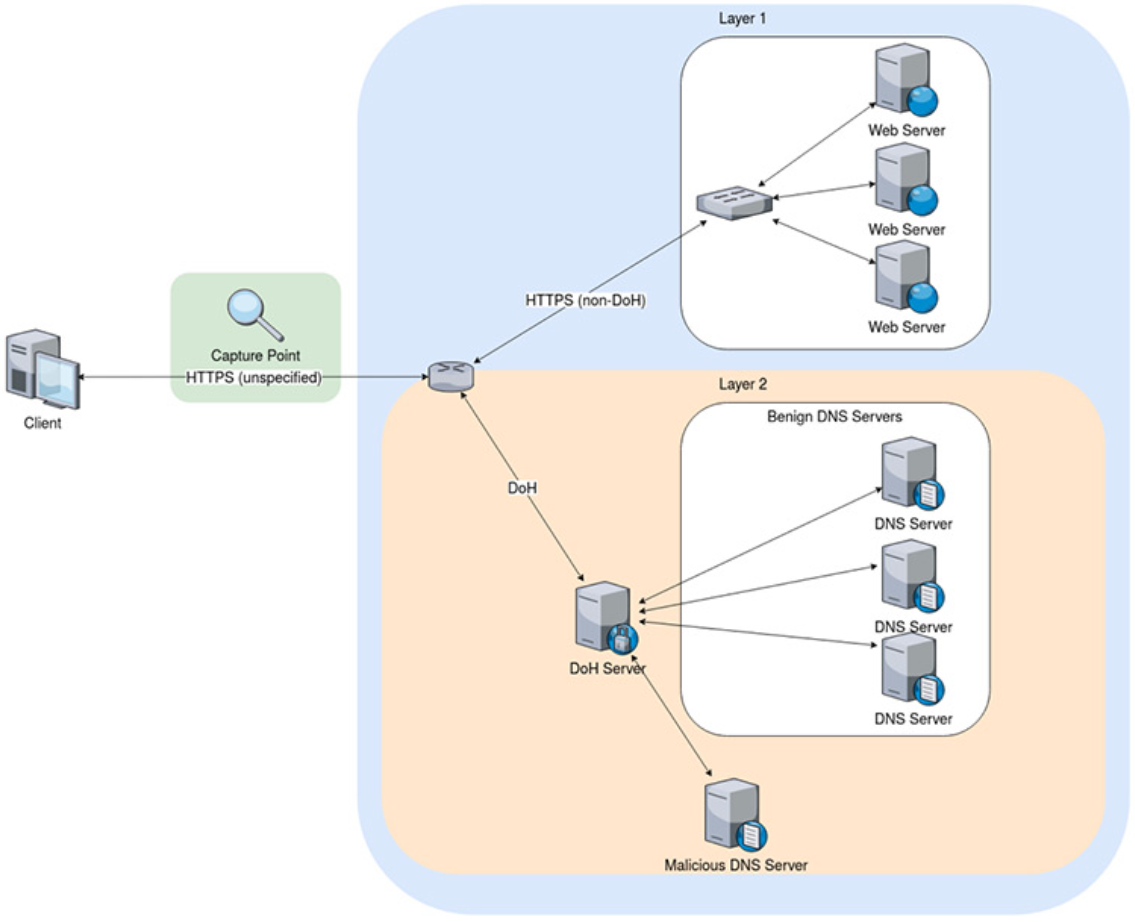

## Características de los datasets según el tipo de tráfico y Objetivo Específico.

### El CIC publicó cuatro datasets en archivos de texto plano con formato CSV, etiquetados y nombrados *l1-DoH*, *l1-nonDoH*, *l2-benign* y *l2-malicious* y como desafío para este proyecto se dispone de un quinto dataset sin etiquetar denominado *Total_1* sobre el cual se harán las predicciones.  Este modelo usará los cuatro datasets por separado para entrenarse según cada uno de los cuatro casos entendiéndose que el modelo logre predecir el tráfico riesgoso (nonDoH y malicious) del tráfico seguro (DoH y benign) y para ello se apoyará en técnicas de Machine Learning supervisado con lo cual se espera clasificacar en riesgoso o seguro el tipo de tráfico que analice en *Total_1*.

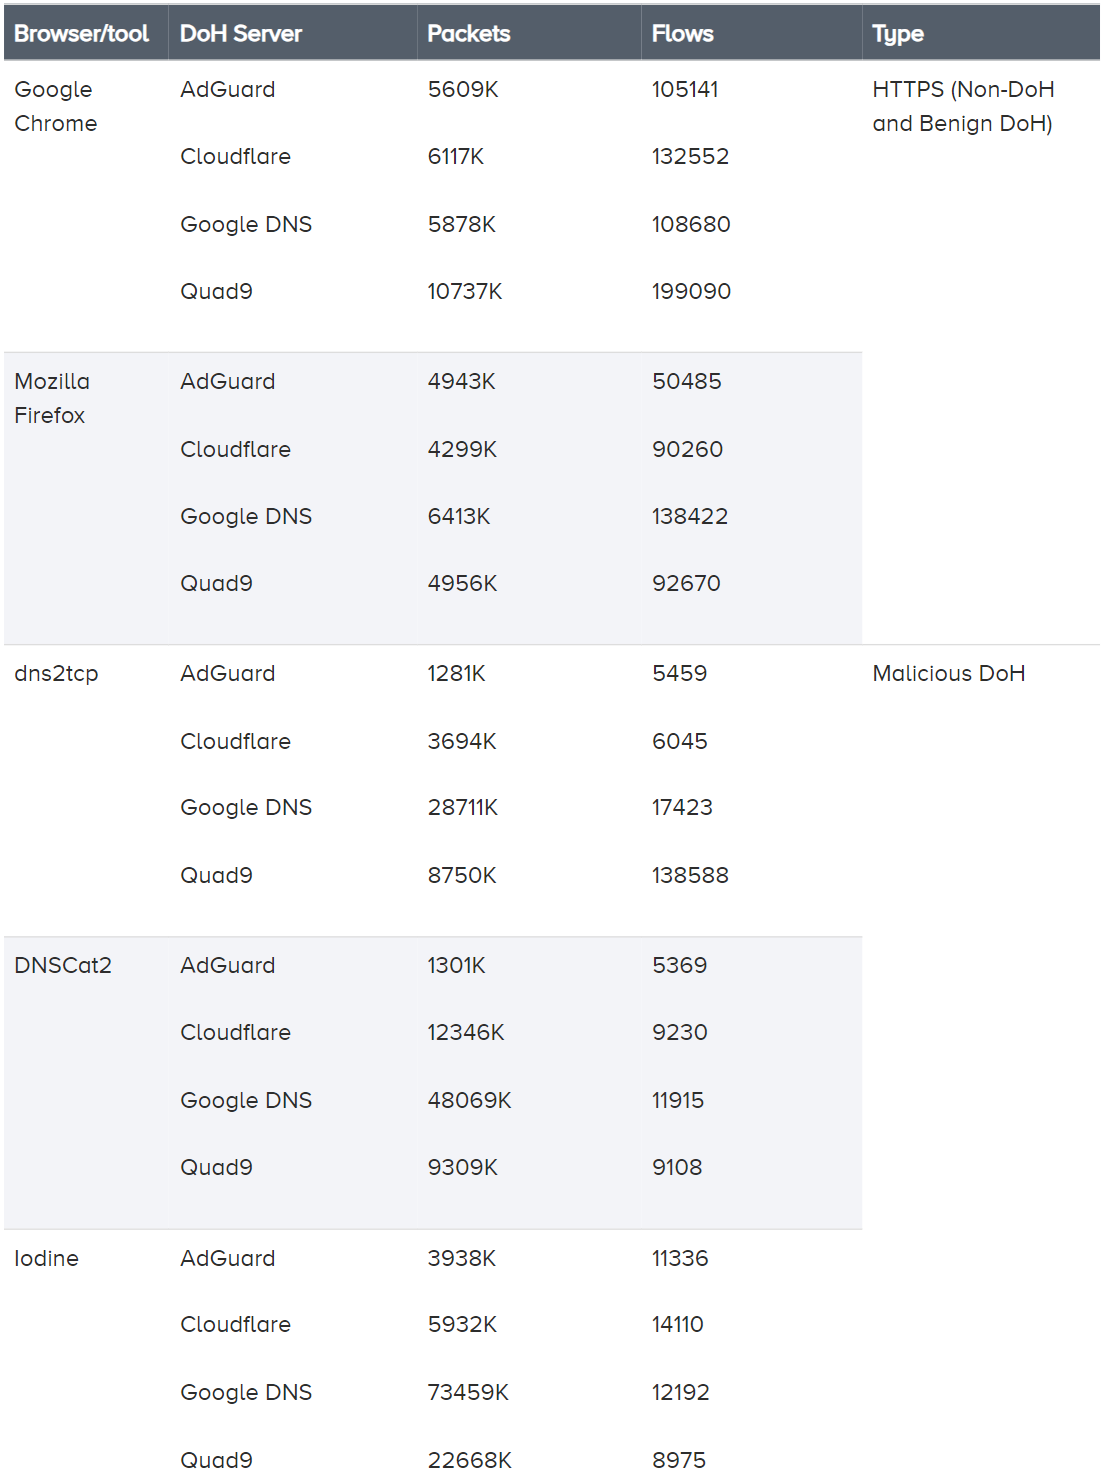

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Datasets/CSVs

/content/drive/MyDrive/Datasets/CSVs


In [ ]:
# Importar librerías, funciones y métodos.

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn as skl
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:

import pandas as pd

dfCS = pd.read_csv('Total_1.csv')

# 9. Limpieza de los datos

### Preliminarmente hay que determinar las columnas categóricas y las numéricas.

1. Identificar si hay datos faltantes.
2. Columnas irrelevantes para el problema a resolver.
3. Observaciones repetidas.
4. Datos atípicos o extremos (outliers) en variables numéricas. Ver si es prudente eliminarlos o no.
5. Errores tipográficos, para el caso de las variables categóricas.

In [ ]:
# Antes de comenzar es bueno visualizar la totalidad de campos y su tipo.

dfCS.info()
# Las observaciones de tipo object suelen ser las categóricas y las demás las numéricas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436779 entries, 0 to 1436778
Data columns (total 35 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   SourceIP                                1436779 non-null  object 
 1   DestinationIP                           1436779 non-null  object 
 2   SourcePort                              1436779 non-null  int64  
 3   DestinationPort                         1436779 non-null  int64  
 4   TimeStamp                               1436779 non-null  object 
 5   Duration                                1436779 non-null  float64
 6   FlowBytesSent                           1436779 non-null  int64  
 7   FlowSentRate                            1436779 non-null  float64
 8   FlowBytesReceived                       1436779 non-null  int64  
 9   FlowReceivedRate                        1436779 non-null  float64
 10  PacketLengthVariance          

## 9.1. Datos faltantes.

### En la celda inmediatamente anterior se distinguen variables categóricas y numéricas, se encuentra una fracción insignificante de campos incompletos en observaciones.

In [ ]:
# Eliminar datos faltantes modificando el dataframe en vez crear uno nuevo.
print(f'Tamaño del dataset previo a la eliminación de datos faltante: {dfCS.shape}')
filas_antes = dfCS.shape[0]
dfCS.dropna(inplace=True)
filas_despues = dfCS.shape[0]
print(f'Tamaño del dataset después de la eliminación de datos faltante: {dfCS.shape}')
print('Las observaciones eliminadas por datos faltantes fueron', filas_antes - filas_despues)

Tamaño del dataset previo a la eliminación de datos faltante: (1436779, 35)
Tamaño del dataset después de la eliminación de datos faltante: (1428407, 35)
Las observaciones eliminadas por datos faltantes fueron 8372


## 9.2. Columnas irrelevantes para el problema a resolver.

### De acuerdo con la información fuente, son 30 los campos de interés de estudio, en ese entendido, se precindirá de los demás por ser irrelevantes (SourceIP, DestinationIP, SourcePort, DestinationPort y TimeStamp, además se verificará que no haya campos categóricos con un solo estado o nivel, o campos numéricos con un sólo valor. Es decir, todos los campos categóricos (de tipo object) deben tener 2 o más subniveles, lo cual se cumple en este dataset.

In [ ]:
print(f'Tamaño del dataset previo a la eliminación de columnas irrelevantes: {dfCS.shape}')
dfCS.drop(columns=['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort', 'TimeStamp'], inplace=True)
print(f'Tamaño del dataset después de la eliminación de columnas irrelevantes: {dfCS.shape}')

Tamaño del dataset previo a la eliminación de columnas irrelevantes: (1428407, 35)
Tamaño del dataset después de la eliminación de columnas irrelevantes: (1428407, 30)


In [ ]:
'''
cols_cat = ['SourceIP', 'DestinationIP', 'TimeStamp']
# Todos los campos CATEGÓRICOS (de tipo object) deben tener 2 o más subniveles.
for col in cols_cat:
  print(f'Campo {col}: {dfCS[col].nunique()} subniveles')
'''

"\ncols_cat = ['SourceIP', 'DestinationIP', 'TimeStamp']\n# Todos los campos CATEGÓRICOS (de tipo object) deben tener 2 o más subniveles.\nfor col in cols_cat:\n  print(f'Campo {col}: {dfCS[col].nunique()} subniveles')\n"

### De igual manera, con los campos de tipo NUMÉRICO se revisa que no tengan un único valor.  Si la *std* (desv estándar) es cero, significa que en ese campo todas las observaciones son la misma y, por lo tanto, todas las filas menos una, deben ser eliminadas. Esto no se dio con este dataset como se ve a continuación.

In [ ]:
# Si la std (desv estándar) es cero, significa que en ese campo todas las observaciones son la misma.
dfCS.describe()

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,...,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
count,1.428407e+06,1.428407e+06,1.428407e+06,1.428407e+06,1.428407e+06,1.428407e+06,1.428407e+06,1.428407e+06,1.428407e+06,1.428407e+06,...,1.428407e+06,1.428407e+06,1.428407e+06,1.428407e+06,1.428407e+06,1.428407e+06,1.428407e+06,1.428407e+06,1.428407e+06,1.428407e+06
mean,2.671450e+01,2.651664e+04,9.069562e+03,5.410913e+04,2.027220e+04,3.060306e+05,3.613916e+02,2.684618e+02,1.347535e+02,1.283001e+02,...,1.101564e+00,1.034280e+00,1.514778e+00,2.554202e-01,3.348804e-01,3.073041e-01,1.605189e-01,-2.251036e+00,-1.262053e+00,9.169730e-01
std,3.907108e+01,1.240980e+05,2.329548e+05,3.313500e+05,1.546339e+05,9.906046e+05,4.188399e+02,2.760727e+02,2.466264e+02,2.988606e+02,...,7.318734e-01,5.832786e-01,1.164644e+01,1.203968e+00,1.803441e+00,2.024217e+00,1.486574e+00,4.176681e+00,4.526322e+00,1.691318e+00
min,3.000000e-06,5.400000e+01,1.047780e+00,5.400000e+01,5.163631e-01,0.000000e+00,0.000000e+00,5.466667e+01,5.400000e+01,5.400000e+01,...,-7.520388e+00,2.350834e-02,0.000000e+00,0.000000e+00,2.000000e-06,2.000000e-06,-1.000000e-06,-1.000000e+01,-1.000000e+01,0.000000e+00
25%,1.317055e-01,3.250000e+02,7.116570e+01,2.440000e+02,1.484538e+02,3.380000e+02,1.838478e+01,7.650000e+01,6.300000e+01,5.500000e+01,...,6.225351e-01,5.790390e-01,2.057347e-09,4.535799e-05,1.204773e-02,1.508700e-02,2.200000e-05,-2.221435e+00,1.647542e-01,1.807045e-03
50%,4.627692e+00,1.692000e+03,8.284356e+02,4.746000e+03,1.665769e+03,1.266689e+05,3.559057e+02,2.234000e+02,7.600000e+01,6.600000e+01,...,1.000000e+00,9.531738e-01,6.113347e-05,7.818790e-03,1.929500e-02,1.612700e-02,7.900000e-05,-9.467735e-01,8.759744e-01,6.712725e-01
75%,3.407078e+01,2.769000e+03,3.624621e+03,8.148000e+03,5.617410e+03,2.838923e+05,5.328154e+02,3.229588e+02,9.850000e+01,6.800000e+01,...,1.632997e+00,1.469587e+00,3.383939e-04,1.839549e-02,4.102366e-02,2.763500e-02,1.958100e-02,6.842053e-01,1.370182e+00,1.009901e+00
max,1.790211e+02,1.597561e+07,9.436036e+07,5.268011e+07,2.200000e+07,8.109299e+07,9.005165e+03,5.146276e+03,2.962000e+03,5.858000e+03,...,2.280171e+01,8.777577e+00,1.002920e+03,3.166891e+01,4.501364e+01,4.501364e+01,4.501364e+01,2.970716e+00,7.096569e+00,7.366547e+01


## 9.3. Observaciones repetidas.

### Se determinará si hay observaciones (filas) idénticas.  En este caso el antes y el después del tamaño del dataset es igual, lo que indica que no hay repeticiones.

In [ ]:
print(f'Tamaño del dataset previo a la eliminación de observaciones repetidas: {dfCS.shape}')
filas_antes = dfCS.shape[0]
dfCS.drop_duplicates(inplace=True)
filas_despues = dfCS.shape[0]
print(f'Tamaño del dataset después de la eliminación de observaciones repetidas: {dfCS.shape}')
print('Las observaciones eliminadas por repetición fueron', filas_antes - filas_despues)

Tamaño del dataset previo a la eliminación de observaciones repetidas: (1428407, 30)
Tamaño del dataset después de la eliminación de observaciones repetidas: (1287778, 30)
Las observaciones eliminadas por repetición fueron 140629


## 9.4. *Outliers*.

### Se determina que, de los 30 campos que se tienen hasta aquí producto de la limpieza, 6 presentan valores de std negativa o son irrelevantes, lo cual no tiene sentido por lo cual se eliminan.  De otro lado, diversos campos tienen *outliers*, pero por su naturaleza es lógico y consistente que los tengan.  En definitiva se precindió de 6 campos de variables numéricas.

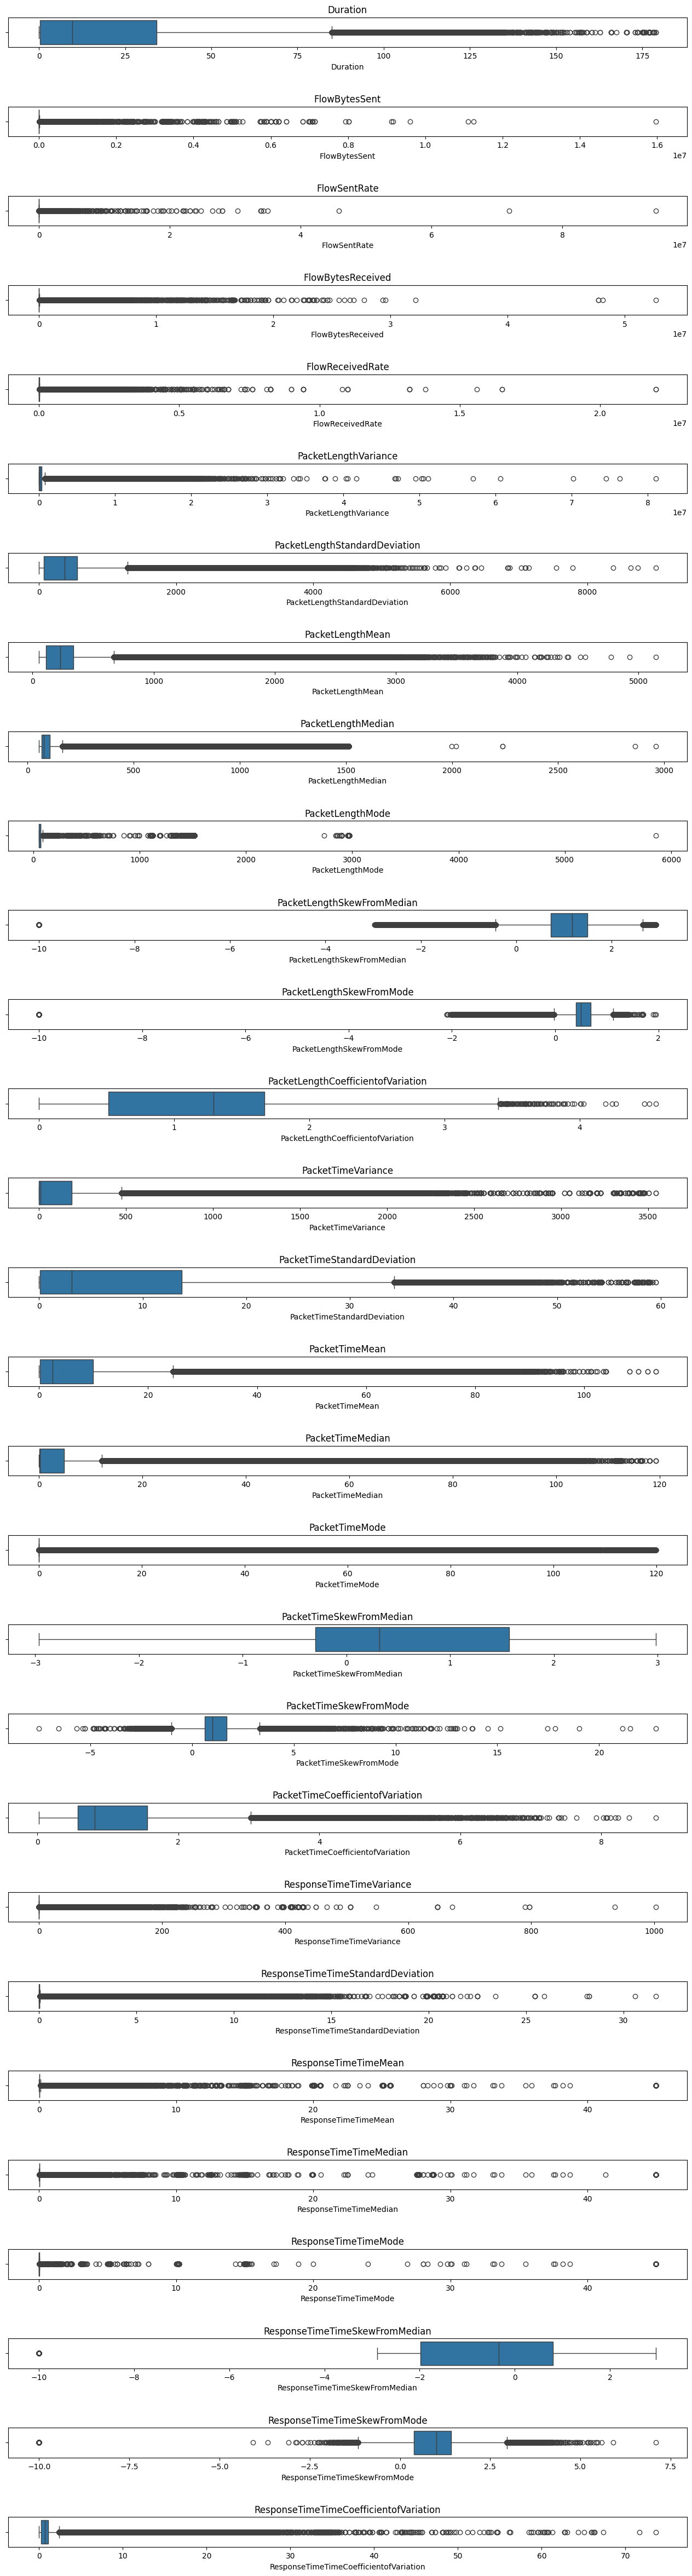

In [ ]:

cols_num = ['Duration', 'FlowBytesSent', 'FlowSentRate', 'FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance', 'PacketLengthStandardDeviation', 'PacketLengthMean', 'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian', 'PacketLengthSkewFromMode', 'PacketLengthCoefficientofVariation', 'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean', 'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeSkewFromMedian', 'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation', 'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean', 'ResponseTimeTimeMedian', 'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode', 'ResponseTimeTimeCoefficientofVariation']
fig, ax = plt.subplots(nrows=29, ncols=1, figsize=(16, 60))


fig.subplots_adjust(hspace=2)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=dfCS, ax=ax[i])
    ax[i].set_title(col)

### En vista que se acaban de encontrar 6 campos con registros negativos, se eliminarán teniendo en cuenta que, al revisar el objetivo, resultan irrelevantes para el estudio. No se eliminarán los registros con valores negativos en esos campos porque ya se hizo de esa manera, resultando eliminado más del 80% del dataset, entonces se opta por precindir de los campos en sí, luego de lo cual ya no se obtienen boxplot con valores negativos.

### Los camposa eliminar son los siguientes:

'PacketLengthSkewFromMedian'

'PacketLengthSkewFromMode'

'PacketTimeSkewFromMedian'

'PacketTimeSkewFromMode'

'ResponseTimeTimeSkewFromMedian'

'ResponseTimeTimeSkewFromMode'

In [ ]:
print(f'Tamaño del dataset previo a la eliminación de columnas irrelevantes: {dfCS.shape}')
dfCS.drop(columns=['PacketLengthSkewFromMedian', 'PacketLengthSkewFromMode', 'PacketTimeSkewFromMedian', 'PacketTimeSkewFromMode', 'ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode'], inplace=True)
print(f'Tamaño del dataset después de la eliminación de columnas irrelevantes: {dfCS.shape}')

Tamaño del dataset previo a la eliminación de columnas irrelevantes: (1287778, 30)
Tamaño del dataset después de la eliminación de columnas irrelevantes: (1287778, 24)


### Luego de eliminar los 6 campos irrelevantes, se verifica con boxplot que no haya valores negativos.

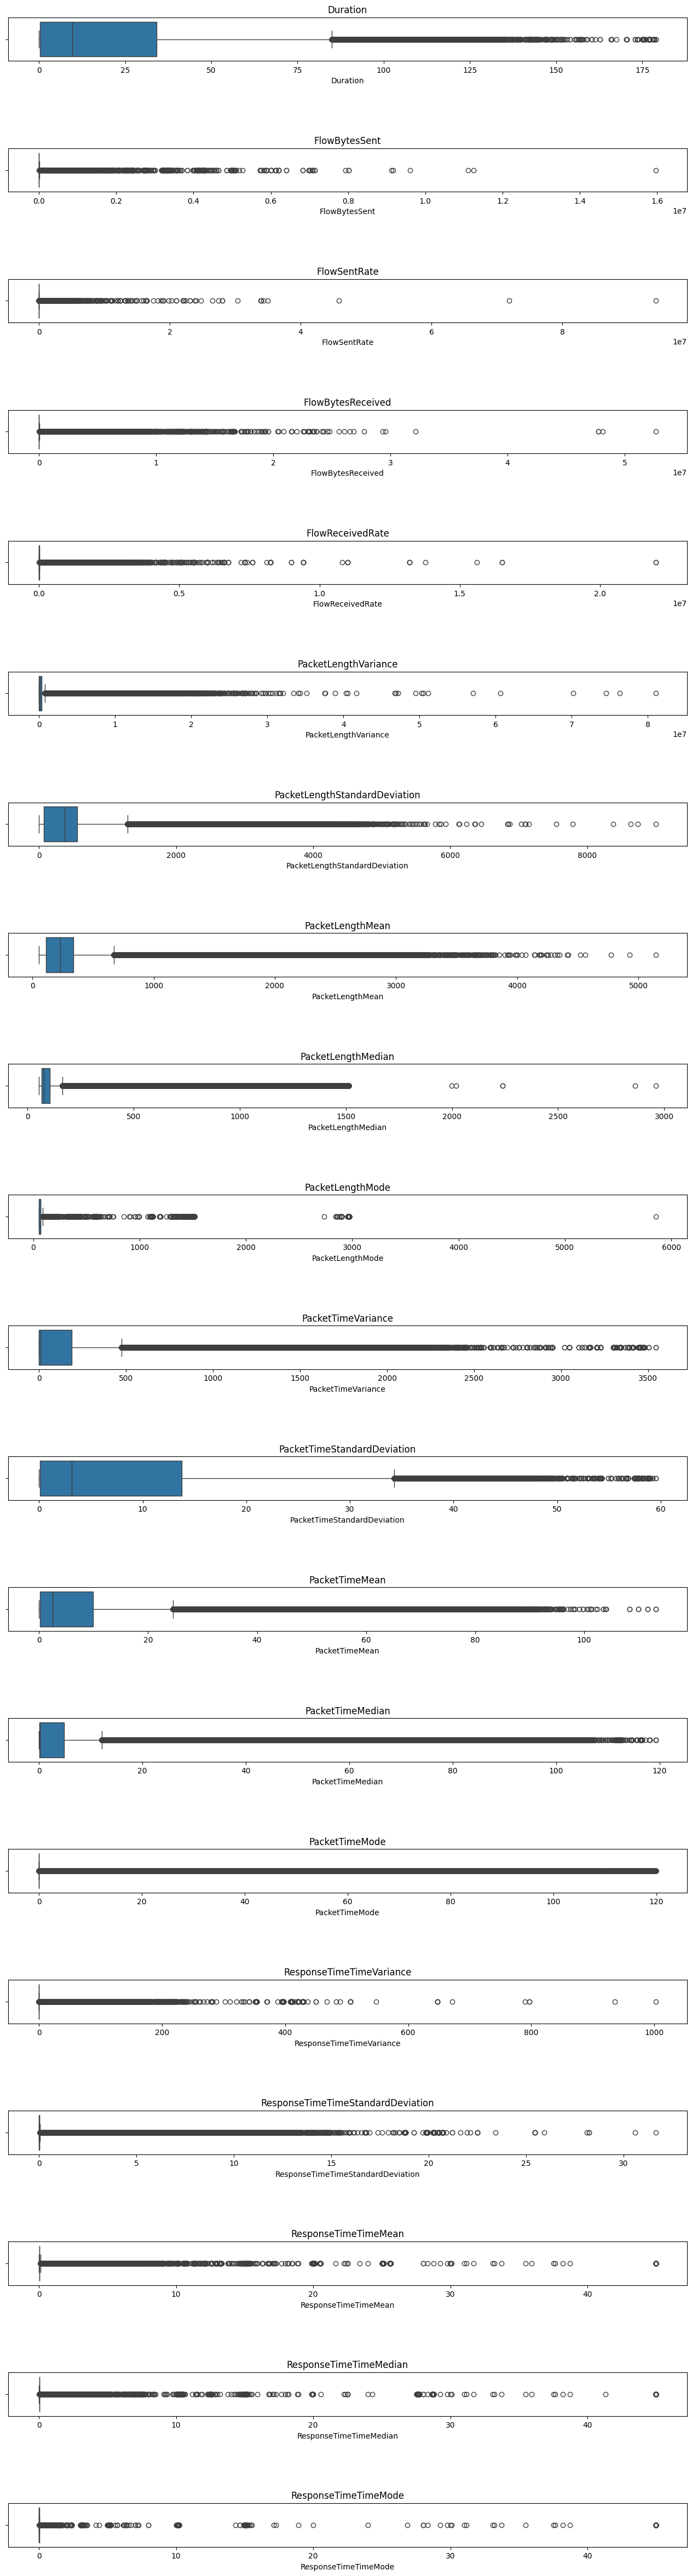

In [ ]:

cols_num = ['Duration', 'FlowBytesSent', 'FlowSentRate', 'FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance', 'PacketLengthStandardDeviation', 'PacketLengthMean', 'PacketLengthMedian', 'PacketLengthMode', 'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean', 'PacketTimeMedian', 'PacketTimeMode', 'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean', 'ResponseTimeTimeMedian', 'ResponseTimeTimeMode']
fig, ax = plt.subplots(nrows=20, ncols=1, figsize=(16, 60))
'''
cols_num = ['FlowBytesSent', 'FlowSentRate', 'FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance', 'PacketLengthStandardDeviation', 'PacketLengthMean', 'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthCoefficientofVariation', 'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean', 'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeCoefficientofVariation', 'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean', 'ResponseTimeTimeMedian', 'ResponseTimeTimeMode', 'ResponseTimeTimeCoefficientofVariation']
fig, ax = plt.subplots(nrows=22, ncols=1, figsize=(16, 60))
'''
fig.subplots_adjust(hspace=2)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=dfCS, ax=ax[i])
    ax[i].set_title(col)

In [ ]:
print(f'Tamaño del dataset luego de eliminar campos con registros negativos: {dfCS.shape}')

Tamaño del dataset luego de eliminar campos con registros negativos: (1287778, 24)


## 9.5. Errores tipográficos para el caso de las variables categóricas.

### De momento no se explorarán datos tipográficos por cuanto los campos tienen principalmente valores expresados en dígitos.

In [ ]:
# Se graficarán con diagramas de barras los subniveles de cada variable categórica.
'''
cols_cat = ['SourceIP', 'DestinationIP', 'TimeStamp']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 15))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=dfCS, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
'''

"\ncols_cat = ['SourceIP', 'DestinationIP', 'TimeStamp']\n\nfig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 15))\nfig.subplots_adjust(hspace=1)\n\nfor i, col in enumerate(cols_cat):\n    sns.countplot(x=col, data=dfCS, ax=ax[i])\n    ax[i].set_title(col)\n    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)\n"

# 10. Exploracion de datos - conteos y series de tiempo

### Gráficas

1. Histograma de Duración de flujo.
2. Media y desviación estándar de la duración del envío y recibo de paquetes
3. Gráfico que representa la cantidad de bytes enviados en cada flujo de datos.
4. Gráfico que representa la cantidad de bytes recibidos en cada flujo de datos.
5. Gráfico de la longitud media de los paquetes de datos.
6. Tiempo medio entre los paquetes de datos enviados y recibidos.
7. Tiempo medio de respuesta en el envío y recepción de datos.
7. Diagrama analítico de correlación mediante mapa de calor.

In [ ]:
print(dfCS.describe())

           Duration  FlowBytesSent  FlowSentRate  FlowBytesReceived  \
count  1.287778e+06   1.287778e+06  1.287778e+06       1.287778e+06   
mean   2.962907e+01   2.940608e+04  6.055255e+03       6.001076e+04   
std    4.008703e+01   1.303736e+05  1.987678e+05       3.484663e+05   
min    3.000000e-06   5.400000e+01  1.047780e+00       5.400000e+01   
25%    2.473995e-01   8.970000e+02  5.591296e+01       7.720000e+02   
50%    9.654308e+00   1.806000e+03  5.425693e+02       4.829000e+03   
75%    3.409323e+01   3.251000e+03  3.883178e+03       9.826000e+03   
max    1.790211e+02   1.597561e+07  9.436036e+07       5.268011e+07   

       FlowReceivedRate  PacketLengthVariance  PacketLengthStandardDeviation  \
count      1.287778e+06          1.287778e+06                   1.287778e+06   
mean       1.965039e+04          3.394459e+05                   4.002366e+02   
std        1.332742e+05          1.037842e+06                   4.233873e+02   
min        5.163631e-01          0.00000

### A los siguientes conteos y series de tiempo se les graficará la media y la desviación estándar como parámetro para determinar estacionalidad, estacionariedad y tendencia.

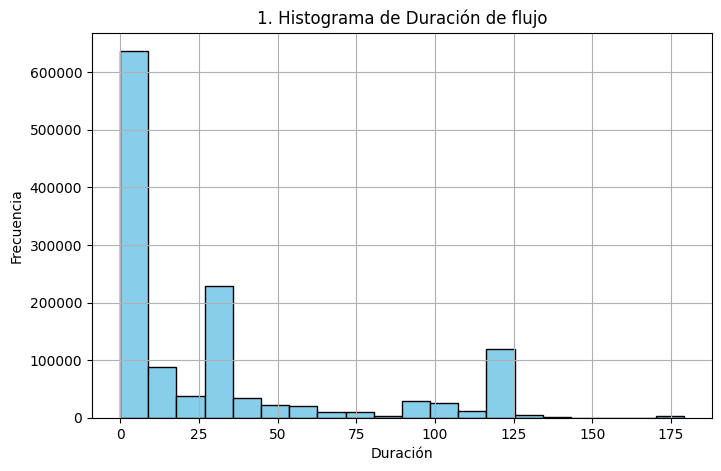

In [ ]:
# Histograma de Duración de Flujo
plt.figure(figsize=(8, 5))
plt.hist(dfCS['Duration'], bins=20, color='skyblue', edgecolor='black')
plt.title('1. Histograma de Duración de flujo')
plt.xlabel('Duración')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Text(0.5, 1.0, '2. Media y desviación estándar de la duración del envío y recibo de paquetes')

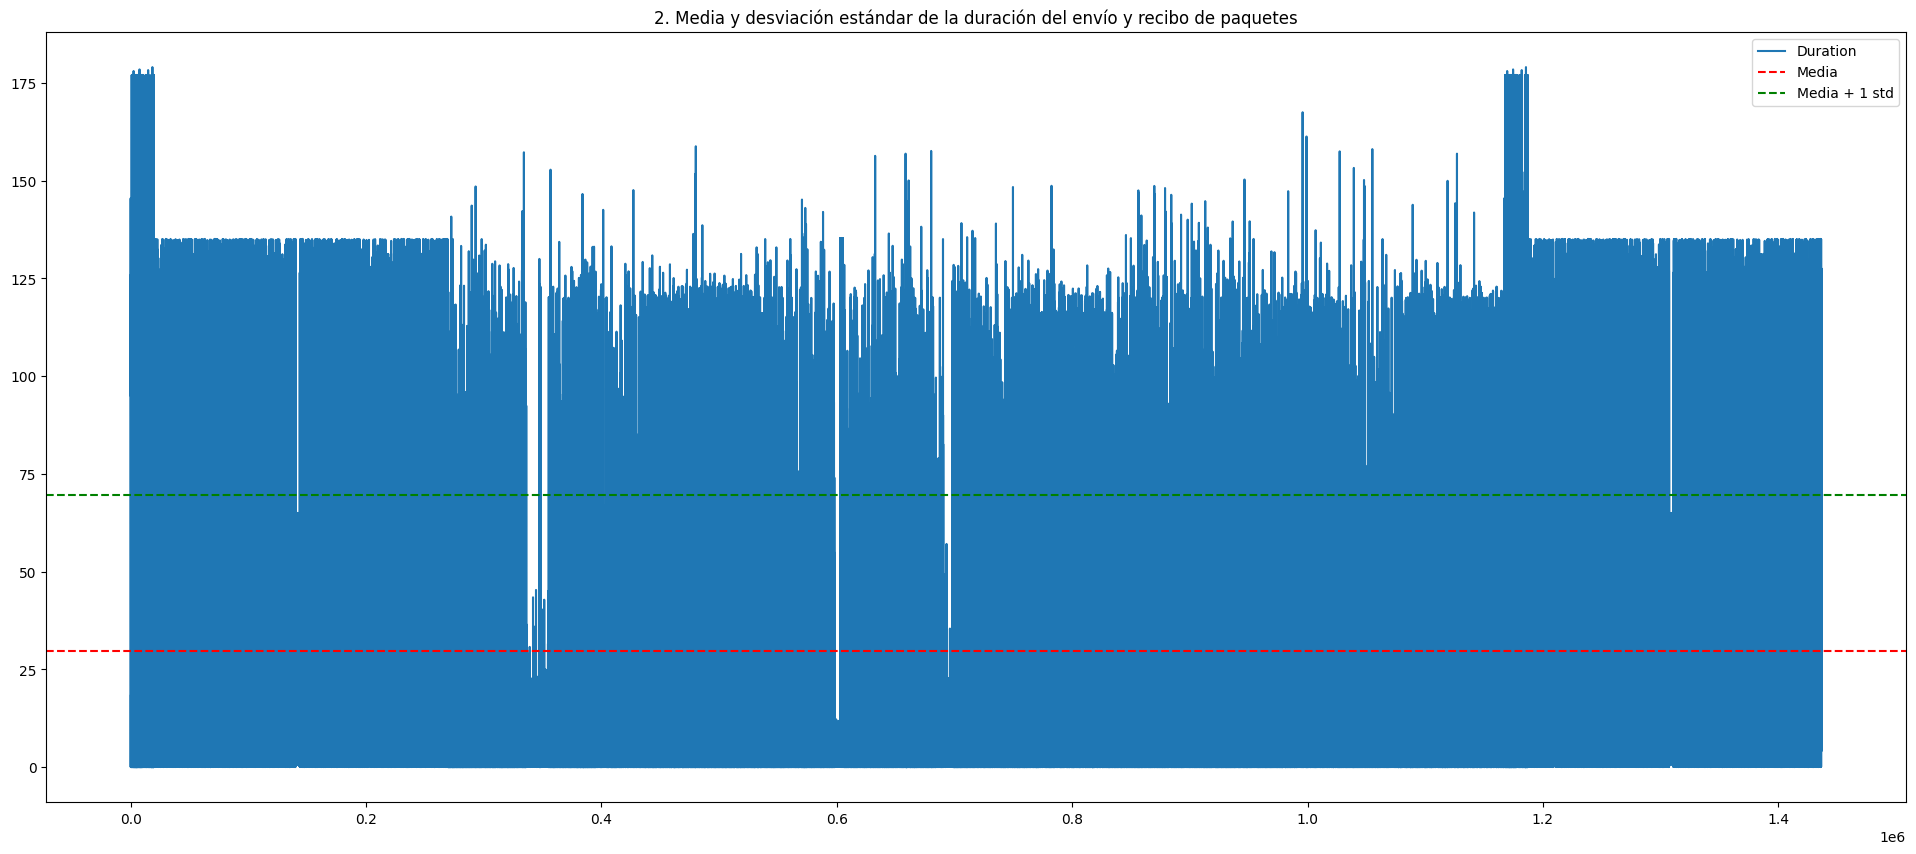

In [ ]:
#Calcular la media y la desviación estándar.

media = dfCS['Duration'].mean() # Calcula el promedio.
desv_std = dfCS['Duration'].std() # Calcula la desviación estándar.
plot = dfCS['Duration'].plot(figsize=(24,10)) # Crea el cuadro del gráfico y grafica los datos.
plt.axhline(media, color='r', linestyle = '--', label = 'Media') # Agrega la línea de la media.
plt.axhline(media + desv_std, color='g', linestyle='--', label='Media + 1 std') # Agraga la línea verde con + 1 desviación estándar.
#plt.axhline(media - desv_std, color='g', linestyle='--', label='Media - 1 std')
plt.legend() # Agrega leyenda y título al gráfico.
plt.title('2. Media y desviación estándar de la duración del envío y recibo de paquetes')

Text(0.5, 1.0, '3. Media y desviación estándar del flujo de bytes enviados')

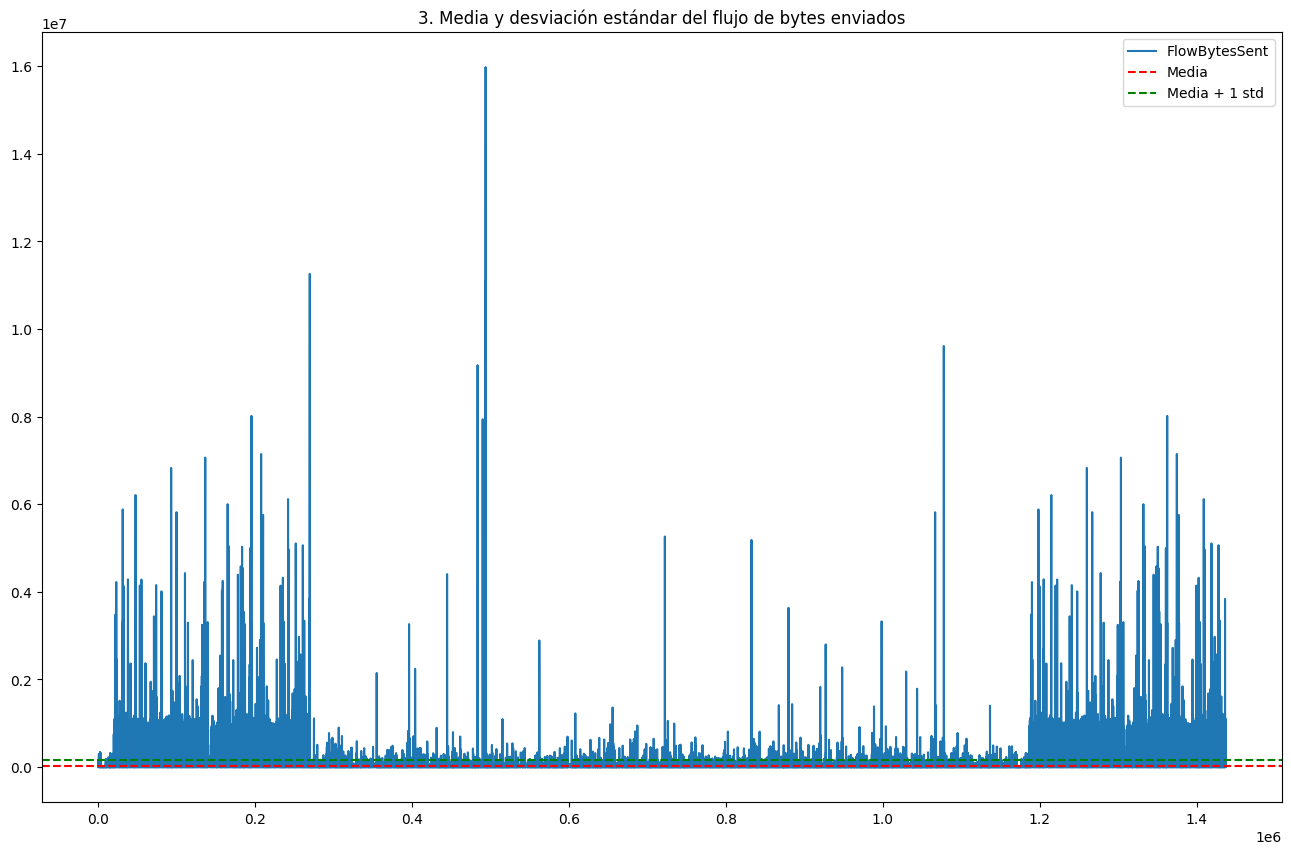

In [ ]:
#Calcular la media y la desviación estándar.

media = dfCS['FlowBytesSent'].mean() # Calcula el promedio.
desv_std = dfCS['FlowBytesSent'].std() # Calcula la desviación estándar.
plot = dfCS['FlowBytesSent'].plot(figsize=(16,10)) # Crea el cuadro del gráfico y grafica los datos.
plt.axhline(media, color='r', linestyle = '--', label = 'Media') # Agrega la línea de la media.
plt.axhline(media + desv_std, color='g', linestyle='--', label='Media + 1 std') # Agraga la línea verde con + 1 desviación estándar.
#plt.axhline(media - desv_std, color='g', linestyle='--', label='Media - 1 std')
plt.legend() # Agrega leyenda y título al gráfico.
plt.title('3. Media y desviación estándar del flujo de bytes enviados')

Text(0.5, 1.0, '4. Media y desviación estándar de la cantidad de bytes recibidos en cada flujo de datos')

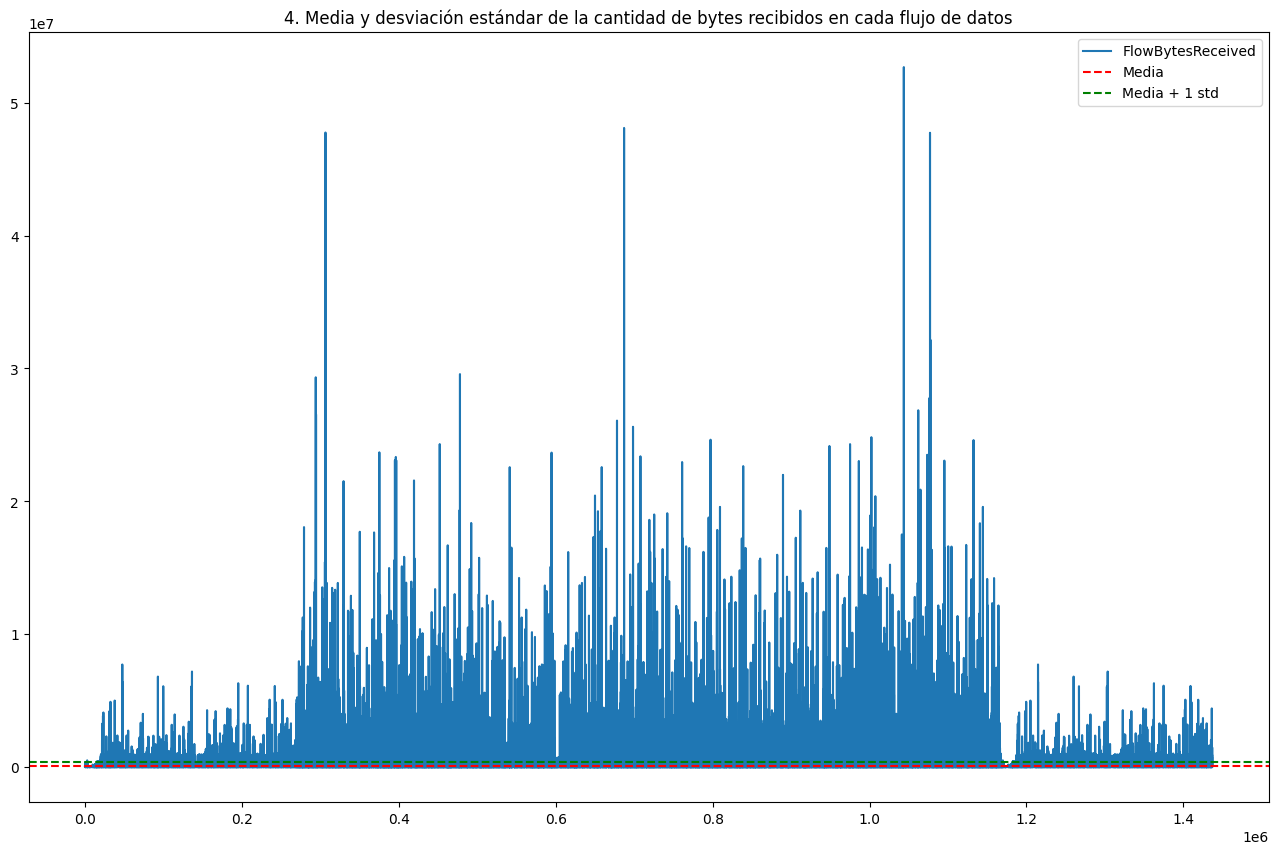

In [ ]:
#Calcular la media y la desviación estándar.

media = dfCS['FlowBytesReceived'].mean() # Calcula el promedio.
desv_std = dfCS['FlowBytesReceived'].std() # Calcula la desviación estándar.
plot = dfCS['FlowBytesReceived'].plot(figsize=(16,10)) # Crea el cuadro del gráfico y grafica los datos.
plt.axhline(media, color='r', linestyle = '--', label = 'Media') # Agrega la línea de la media.
plt.axhline(media + desv_std, color='g', linestyle='--', label='Media + 1 std') # Agraga la línea verde con + 1 desviación estándar.
#plt.axhline(media - desv_std, color='g', linestyle='--', label='Media - 1 std')
plt.legend() # Agrega leyenda y título al gráfico.
plt.title('4. Media y desviación estándar de la cantidad de bytes recibidos en cada flujo de datos')

Text(0.5, 1.0, '5. Media y desviación estándar de la longitud media de los paquetes de datos')

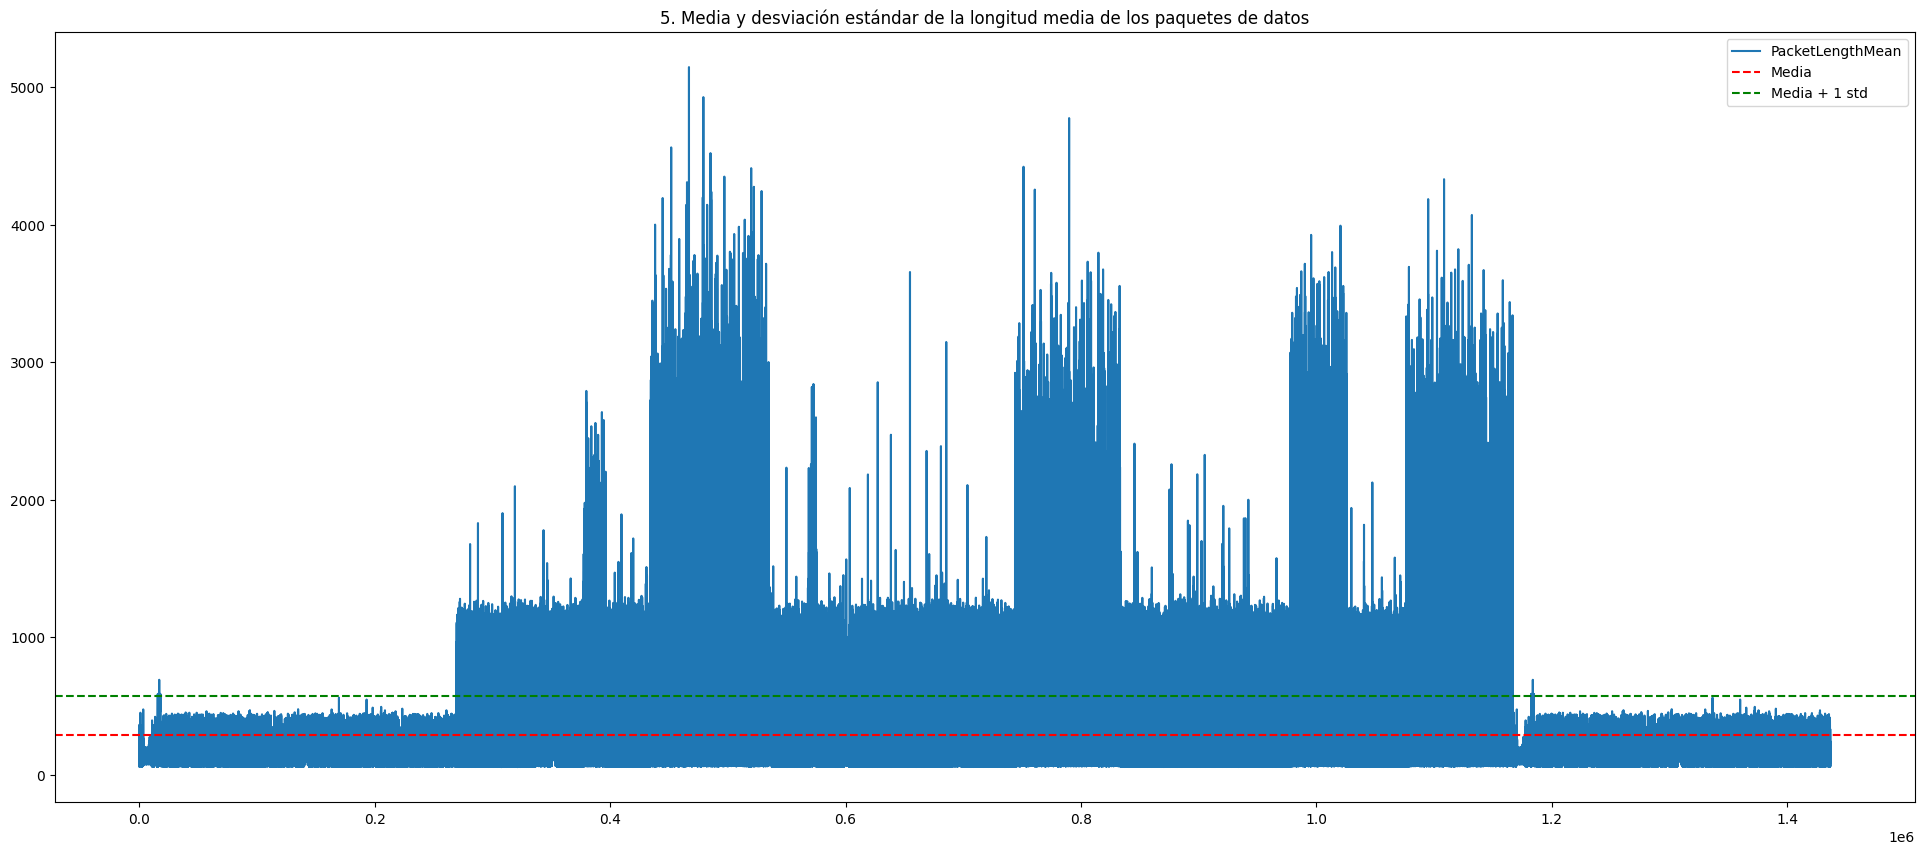

In [ ]:
#Calcular la media y la desviación estándar.

media = dfCS['PacketLengthMean'].mean() # Calcula el promedio.
desv_std = dfCS['PacketLengthMean'].std() # Calcula la desviación estándar.
plot = dfCS['PacketLengthMean'].plot(figsize=(24,10)) # Crea el cuadro del gráfico y grafica los datos.
plt.axhline(media, color='r', linestyle = '--', label = 'Media') # Agrega la línea de la media.
plt.axhline(media + desv_std, color='g', linestyle='--', label='Media + 1 std') # Agraga la línea verde con + 1 desviación estándar.
#plt.axhline(media - desv_std, color='g', linestyle='--', label='Media - 1 std')
plt.legend() # Agrega leyenda y título al gráfico.
plt.title('5. Media y desviación estándar de la longitud media de los paquetes de datos')

Text(0.5, 1.0, '6. Media y desviación estándar del tiempo medio entre los paquetes de datos')

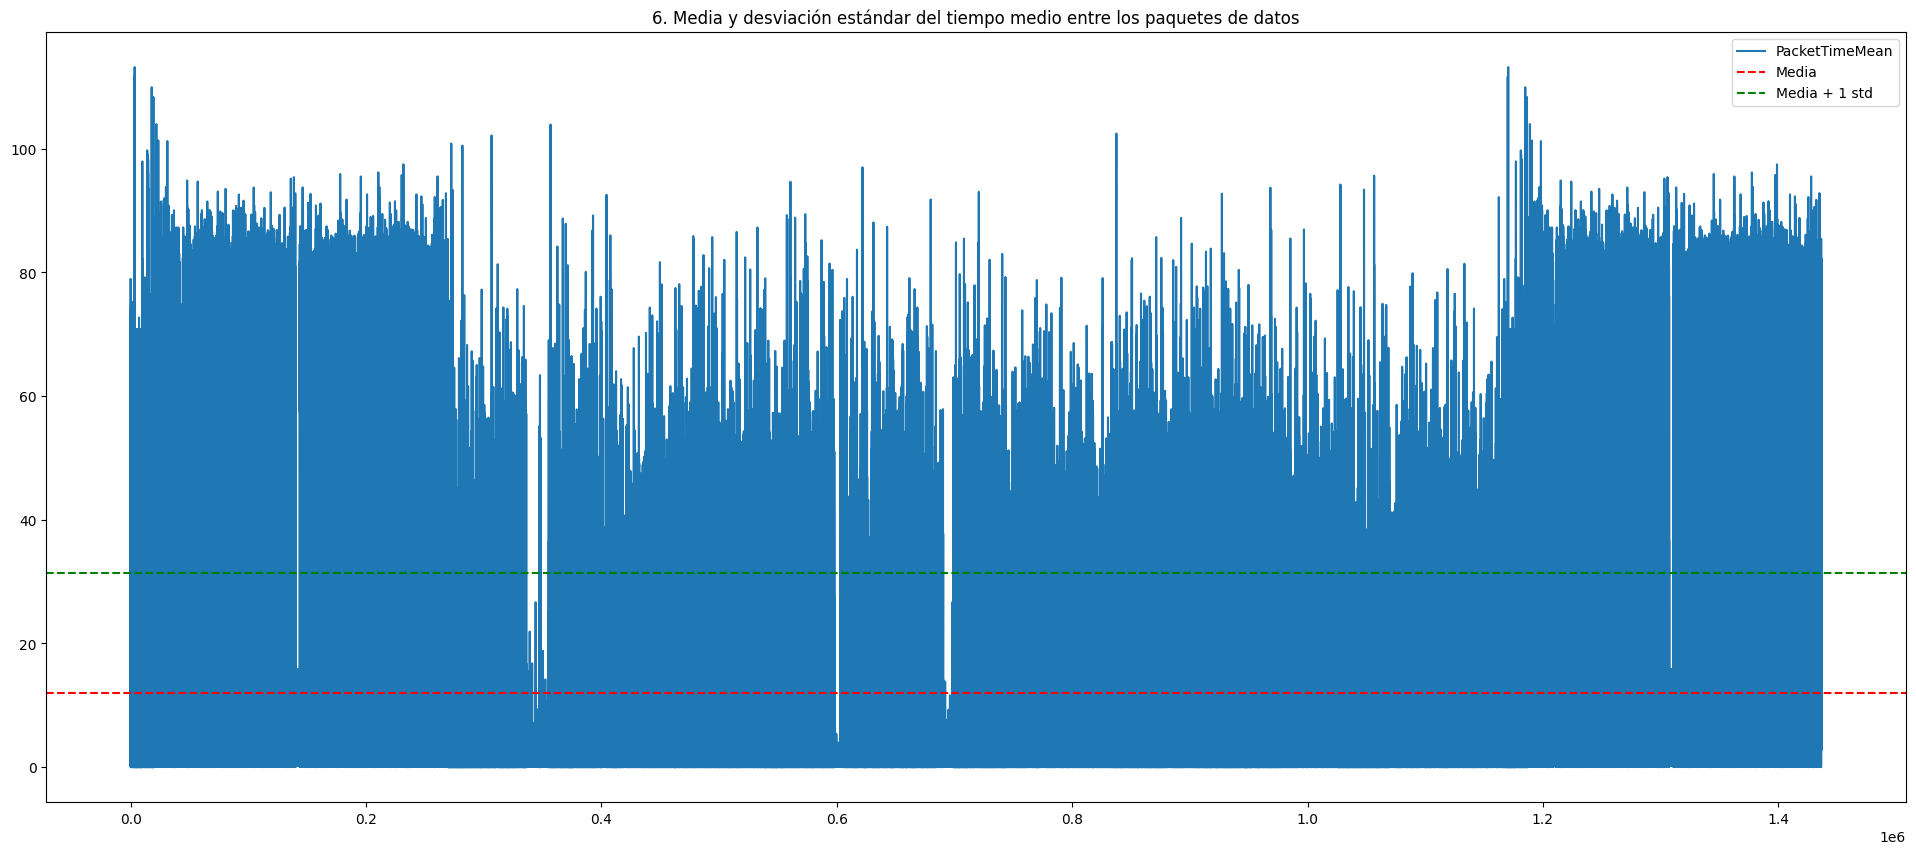

In [ ]:
#Calcular la media y la desviación estándar.

media = dfCS['PacketTimeMean'].mean() # Calcula el promedio.
desv_std = dfCS['PacketTimeMean'].std() # Calcula la desviación estándar.
plot = dfCS['PacketTimeMean'].plot(figsize=(24,10)) # Crea el cuadro del gráfico y grafica los datos.
plt.axhline(media, color='r', linestyle = '--', label = 'Media') # Agrega la línea de la media.
plt.axhline(media + desv_std, color='g', linestyle='--', label='Media + 1 std') # Agraga la línea verde con + 1 desviación estándar.
#plt.axhline(media - desv_std, color='g', linestyle='--', label='Media - 1 std')
plt.legend() # Agrega leyenda y título al gráfico.
plt.title('6. Media y desviación estándar del tiempo medio entre los paquetes de datos')

Text(0.5, 1.0, '7. Media y desviación estándar del tiempo medio de respuesta')

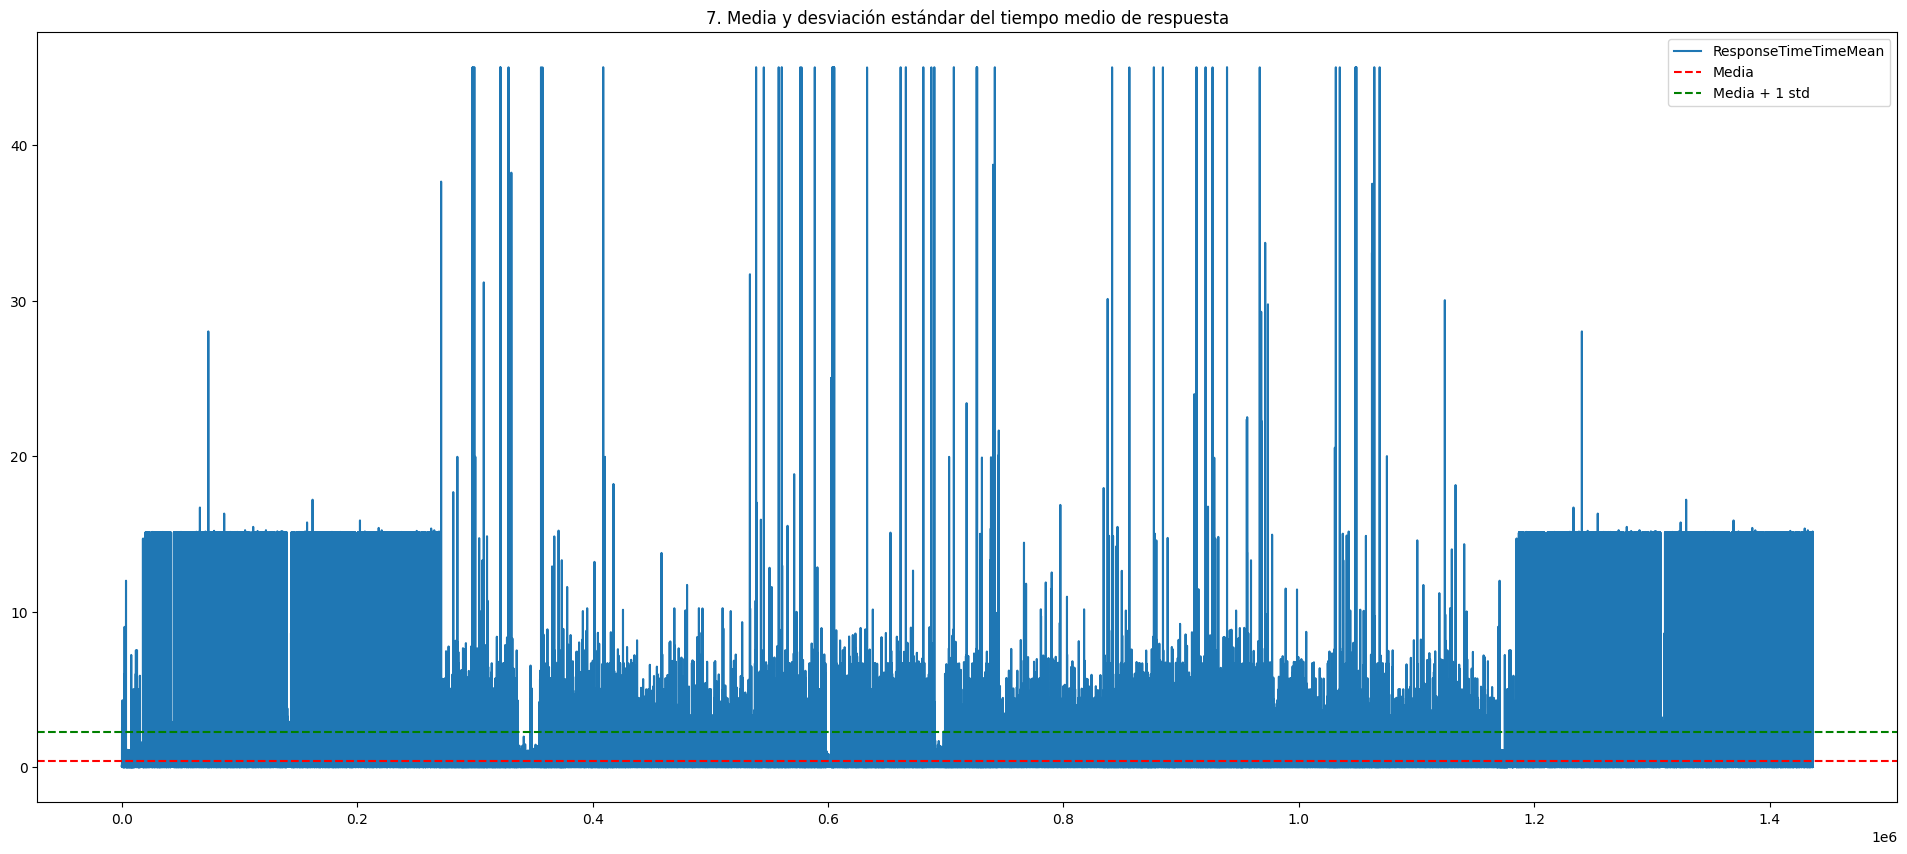

In [ ]:
#Calcular la media y la desviación estándar.

media = dfCS['ResponseTimeTimeMean'].mean() # Calcula el promedio.
desv_std = dfCS['ResponseTimeTimeMean'].std() # Calcula la desviación estándar.
plot = dfCS['ResponseTimeTimeMean'].plot(figsize=(24,10)) # Crea el cuadro del gráfico y grafica los datos.
plt.axhline(media, color='r', linestyle = '--', label = 'Media') # Agrega la línea de la media.
plt.axhline(media + desv_std, color='g', linestyle='--', label='Media + 1 std') # Agraga la línea verde con + 1 desviación estándar.
#plt.axhline(media - desv_std, color='g', linestyle='--', label='Media - 1 std')
plt.legend() # Agrega leyenda y título al gráfico.
plt.title('7. Media y desviación estándar del tiempo medio de respuesta')

In [ ]:
# Análisis de correlación mediante mapa de calor.
# El Heatmap Aplica sólo para variables númericas. En este caso no procede porque el modelo tiene como variable objetivo el campo Laber, que es un object (string).
'''
plt.figure(figsize=(21, 12))
correlation_matrix = dfCS.select_dtypes('number').corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('8. Matriz de correlación (mapa de calor)')
plt.show()
'''

"\nplt.figure(figsize=(21, 12))\ncorrelation_matrix = dfCS.select_dtypes('number').corr()\nsns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm')\nplt.title('8. Matriz de correlación (mapa de calor)')\nplt.show()\n"

In [ ]:
#Calcular la media y la desviación estándar en un intervalo pequeño de datos de la tasa de flujo recibido.
'''
dfFRR = dfCS['FlowReceivedRate'] # Crea el nuevo df llamado dfFRR con el campo llamado 'FlowReceivedRate'.
media = dfFRR.mean() # Calcula el promedio.
desv_std = dfFRR.std() # Calcula la desviación estándar.
intervalo_FRR = dfFRR[(dfFRR > 6e3) & (dfFRR <= 6e4)] # Calcula el intervalo con los datos dentro de la restricción.
#plot = dfCS['FlowReceivedRate'].plot(figsize=(24,10)) # Crea el cuadro del gráfico y grafica los datos.
plot = intervalo_FRR.plot(figsize=(24,10)) # Crea el cuadro del gráfico y grafica los datos filtrados.
plt.axhline(media, color='r', linestyle = '--', label = 'Media') # Agrega la línea de la media.
plt.axhline(media + desv_std, color='g', linestyle='--', label='Media + 1 std') # Agraga la línea verde más 1 desviación estándar.
#plt.axhline(media - desv_std, color='g', linestyle='--', label='Media - 1 std') # Agraga la línea verde menos 1 desviación estándar.
plt.legend() # Agrega leyenda y título al gráfico.
plt.title('Gráfico con media y desviación estándar de la rata de flujo recibido')
'''

"\ndfFRR = dfCS['FlowReceivedRate'] # Crea el nuevo df llamado dfFRR con el campo llamado 'FlowReceivedRate'.\nmedia = dfFRR.mean() # Calcula el promedio.\ndesv_std = dfFRR.std() # Calcula la desviación estándar.\nintervalo_FRR = dfFRR[(dfFRR > 6e3) & (dfFRR <= 6e4)] # Calcula el intervalo con los datos dentro de la restricción.\n#plot = dfCS['FlowReceivedRate'].plot(figsize=(24,10)) # Crea el cuadro del gráfico y grafica los datos.\nplot = intervalo_FRR.plot(figsize=(24,10)) # Crea el cuadro del gráfico y grafica los datos filtrados.\nplt.axhline(media, color='r', linestyle = '--', label = 'Media') # Agrega la línea de la media.\nplt.axhline(media + desv_std, color='g', linestyle='--', label='Media + 1 std') # Agraga la línea verde más 1 desviación estándar.\n#plt.axhline(media - desv_std, color='g', linestyle='--', label='Media - 1 std') # Agraga la línea verde menos 1 desviación estándar.\nplt.legend() # Agrega leyenda y título al gráfico.\nplt.title('Gráfico con media y desviación 

In [ ]:
# Conservar dfCS copiándolo a un nuevo df denominado dfCS_proceced.

dfCS_proceced = dfCS
dfCS_proceced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1287778 entries, 0 to 1436778
Data columns (total 24 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   Duration                                1287778 non-null  float64
 1   FlowBytesSent                           1287778 non-null  int64  
 2   FlowSentRate                            1287778 non-null  float64
 3   FlowBytesReceived                       1287778 non-null  int64  
 4   FlowReceivedRate                        1287778 non-null  float64
 5   PacketLengthVariance                    1287778 non-null  float64
 6   PacketLengthStandardDeviation           1287778 non-null  float64
 7   PacketLengthMean                        1287778 non-null  float64
 8   PacketLengthMedian                      1287778 non-null  float64
 9   PacketLengthMode                        1287778 non-null  int64  
 10  PacketLengthCoefficientofVariation 

# 11. Modelo de clasificación supervisado con Machine Learning.

### Se utilizará el algoritmo de clasificación de Árboles de Decisión, que es bastante simple pero efectivo para propósitos educativos.

### Aunque el algoritmo basado en árboles de decisión no es perfecto y tiene algunas limitaciones, como su tendencia al sobreajuste en datasets muy complejos y su esporádica incapacidad para capturar relaciones sofisticadas entre características, suele proporcionar resultados satisfactorios y es un buen punto de partida para problemas de clasificación como este.

### De esta manera, para la solución del problema se catalogó como una opción sólida y apropiada la clasificación mediante machine learning, en particular porque se desea interpretar y entender la forma como se realiza dicha clasificación.

In [ ]:
# Separar el DataFrame en X (características)  y (objetivo)

X = dfCS_proceced.drop(columns=['Label'])
y = dfCS_proceced['Label']

In [ ]:
# Dividir los datos en grupo para entrenamiento y grupo para validación.

#X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=12)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Codificando las variables categóricas a numéricas.
'''
codificador = LabelEncoder()
#codificador = OneHotEncoder(sparse=False)
y_train = codificador.fit_transform(y_train)
y_test = codificador.transform(y_test)
'''

'\ncodificador = LabelEncoder()\n#codificador = OneHotEncoder(sparse=False)\ny_train = codificador.fit_transform(y_train)\ny_test = codificador.transform(y_test)\n'

In [ ]:
# Ajustar los hiperparámetros con una grilla de pruebas mediante GridSearchCV.
'''
DEFINICIONES:
random_state:       Semilla (seed) para pseudoaleatoriedad que asegura que los resultados sean los mismos (reproducibles) cada vez que se ejecuta el código.
max_depth:          Limita la profundidad máxima del árbol.
min_samples_leaf:   Especifica el número mínimo de muestras requeridas en una hoja.
min_samples_split:  Establece el número mínimo de muestras requeridas para dividir un nodo interno.
criterion:          Especifica la función para medir la calidad de una división.
max_features:       Controla el número máximo de características a considerar cuando se busca la mejor división.
'''

dtc = DecisionTreeClassifier()

paramet = {
    'random_state': [15, 42],
    'max_depth': [10, 15],
    'min_samples_leaf': [13, 20],
    'min_samples_split': [10, 15],
    'criterion': ['gini', 'entropy'],
    'max_features': ['log2', 'sqrt']
}
cross_val = GridSearchCV(dtc, param_grid=paramet, n_jobs=1)
cross_val.fit(X_train, y_train)
print('Los hiperparámetros mejor estimados son:', cross_val.best_params_)

Los hiperparámetros mejor estimados son: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 13, 'min_samples_split': 10, 'random_state': 15}


In [ ]:
# Crear y entrenar el modelo de clasificación con los hyperparámetros "tuneados" a partir de la grilla anterior.

#model = GradientBoostingRegressor(n_estimators=250, learning_rate=0.05, max_depth=7, subsample=0.8, random_state=12, loss='squared_error')
#model = KNeighborsClassifier(n_neighbors=10, weights='uniform', metric='manhattan')
model = DecisionTreeClassifier(random_state=15, max_depth=10, min_samples_leaf=13, min_samples_split=10, criterion='entropy', max_features='log2')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_leaf=13, min_samples_split=10,
                       random_state=15)

In [ ]:
# Realizando validación cruzada.
'''
NOTA: Se evaluará el rendimiento del modelo para verificar el ajuste de los hiperparámetros de manera robusta.
'scikit-learn' proporciona cross_val_score y GridSearchCV para facilitar la implementación de validación cruzada y búsqueda de hiperparámetros de manera simultánea.
'''
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Puntuaciones de validación cruzada:", scores)
print(f"Puntuación media: {scores.mean():.4f} +/- {scores.std():.4f}")

Puntuaciones de validación cruzada: [0.72545    0.7693589  0.77096243 0.77018501 0.77262332]
Puntuación media: 0.7617 +/- 0.0182


In [ ]:
# Haciendo predicciones con el conjunto de validación.

predic = model.predict(X_test)
print('Prediga:', predic)

Prediga: ['NonDoH' 'NonDoH' 'NonDoH' ... 'Malicious' 'NonDoH' 'NonDoH']


In [ ]:
# Generar la matriz de confusión.

'''
NOTA: Mediante un resúmen de las predicciones realizadas en comparación con los valores reales, evalúa el rendimiento del modelo.
Es especialmente útil para medir la exactitud general del modelo al calcular métricas como la precisión, recall (sensibilidad), especificidad y la tasa de falsos positivos y falsos negativos.
También permite identificación de errores comunes al identificar qué tipos de errores comete el modelo con más frecuencia, como confundir una clase con otra.
'''

confusion_matrix(y_test, predic)

array([[   842,   1739,      3,   1247],
       [   999,  36823,  14245,   1429],
       [     2,  36461,  13385,    236],
       [   100,    516,     81, 149448]], dtype=int64)

In [ ]:
# Mostar el reporte de clasificación.
'''
DEFINICIONES:

Precision:              Indica la proporción de instancias predichas como positivas que fueron correctamente clasificadas. Se calcula como TP / (TP + FP),
donde TP es el número de verdaderos positivos y FP es el número de falsos positivos.

Recall (Sensibilidad):  Indica la proporción de instancias positivas que fueron correctamente identificadas por el modelo. Se calcula como TP / (TP + FN),
donde FN es el número de falsos negativos.

F1-score:               Es la media armónica de precision y recall, proporcionando un balance entre ambas métricas.
Se calcula como 2 * (precision * recall) / (precision + recall).

Support:                Es el número de muestras verdaderas para cada clase.
'''
print('Reporte de clasificación:\n', classification_report(y_test, predic))

Reporte de clasificación:
               precision    recall  f1-score   support

      Benign       0.43      0.22      0.29      3831
         DoH       0.49      0.69      0.57     53496
   Malicious       0.48      0.27      0.34     50084
      NonDoH       0.98      1.00      0.99    150145

    accuracy                           0.78    257556
   macro avg       0.60      0.54      0.55    257556
weighted avg       0.77      0.78      0.77    257556



In [ ]:
# Calculando la precisión Accuracy por separado.

precision = accuracy_score(y_test, predic)
print(f'Precision: {precision:.5f}')

Precision: 0.77846


Precision: 0.66382

Precision: 0.62178

Precision: 0.76996


In [ ]:
# Verificar ajuste correcto verificando subajuste o sobre ajuste.
'''
DEFINICIONES:
Sobreajuste: Si el modelo tiene una precisión alta en los datos de entrenamiento pero baja en los datos de prueba, podría estar sobreajustando los datos de entrenamiento y no generalizando bien a nuevos datos.
Subajuste:   Si el modelo tiene una baja precisión en ambos conjuntos, podría ser un indicio de que el modelo es demasiado simple para capturar las relaciones en los datos.
'''
print('Score entranmiento:', model.score(X_train, y_train))
print('Score de prueba:', model.score(X_test, y_test))

Score entranmiento: 0.7844406351252449
Score de prueba: 0.7784637127459659


# 12. ANÁLISIS

## Interpretación por Clase:
### Benign:

- Precision: 0.43 significa que el 43% de las instancias clasificadas como Benign fueron realmente Benignas.
- Recall: 0.22 indica que solo se identificó correctamente el 22% de todas las instancias Benignas.
- F1-score: 0.29 es la medida armónica de precision y recall para la clase Benign.
- Support: Hay 3,831 instancias verdaderas de la clase Benign en los datos de prueba.

### DoH:

- Precision: 0.49 indica que el 49% de las predicciones clasificadas como DoH eran correctas.
- Recall: 0.69 significa que se capturó el 69% de todas las instancias verdaderas de DoH.
- F1-score: 0.57 es la medida armónica de precision y recall para la clase DoH.
- Support: Hay 53,496 instancias verdaderas de la clase DoH en los datos de prueba.

### Malicious:

- Precision: 0.48 indica que el 48% de las predicciones clasificadas como Malicious eran correctas.
- Recall: 0.27 significa que se identificó correctamente el 27% de todas las instancias Malicious.
- F1-score: 0.34 es la medida armónica de precision y recall para la clase Malicious.
- Support: Hay 50,084 instancias verdaderas de la clase Malicious en los datos de prueba.

### NonDoH:

- Precision: 0.98 indica que el 98% de las predicciones clasificadas como NonDoH eran correctas.
- Recall: 1.00 significa que se identificó correctamente el 100% de todas las instancias NonDoH.
- F1-score: 0.99 es la medida armónica de precision y recall para la clase NonDoH.
- Support: Hay 150,145 instancias verdaderas de la clase NonDoH en los datos de prueba.

## Macro y Weighted Avg:

- Macro Avg: Calcula las métricas promedio no ponderadas para todas las clases. En este caso, el promedio de precision, recall y f1-score no ponderado es 0.60, 0.54 y 0.55 respectivamente.
- Weighted Avg: Calcula las métricas promedio ponderadas por el soporte (número de instancias verdaderas para cada clase). En este caso, el promedio ponderado de precision, recall y f1-score es 0.77, 0.78 y 0.77 respectivamente.

## Métricas Globales:

- Accuracy: Es la proporción de predicciones correctas respecto al total de predicciones realizadas por el modelo. En este caso, es 0.78, lo que indica que el 78% de las predicciones fueron correctas.
- Overfitting o underfitting: El score de entrenamiento es ligeramente mayor que el score de prueba, pero no hay una diferencia significativa entre ellos. Esto sugiere que el modelo generaliza razonablemente bien con datos nuevos (score de prueba), lo cual es positivo. No parece haber evidencia clara de overfitting, ya que el score de prueba no es considerablemente menor que el score de entrenamiento. Tampoco parece haber evidencia clara de underfitting, ya que ambos scores son relativamente altos (cerca de 0.78).



# 13. CONCLUSIONES

- El modelo parece tener un buen rendimiento para la clase NonDoH, con alta precisión, recall y f1-score.
- Las clases Benign, DoH y Malicious muestran un rendimiento variado, con recall relativamente bajo en comparación con la precisión en las clases Benign y Malicious.
- El weighted avg muestra cómo el modelo se comporta globalmente, considerando el desbalance de clases en los datos.

# 14. APENDICE

## Automatizando el aprendizaje automático con la herramienta Auto-sklearn.

## Herramienta muy útil para explorar rápidamente diferentes modelos y configuraciones para el problema propuesto.  

Por problemas de compatibilidad, hasta el momento no ha sido posible lograr la instalación de Auto-sklearn en el editor.

In [ ]:
# Instalar la herramienta.

!pip install auto-sklearn

In [ ]:
# Importar la librería Auto-sklearn.

import autosklearn.classification

In [ ]:
# Configurar y ajustar el clasificador de Auto-sklearn

autml = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=120, per_run_time_limit=30)
autml.fit(X_train, y_train)

In [ ]:
# Predecir con el modelo ajustado.

y_pred = autml.predict(X_test)

In [ ]:
# Calcular la precisión del automodelo.

precision = accuracy_score(y_test, y_pred)
print(f'Precision: {precision:.5f}')

In [ ]:
# Mostrar las estadísticas del modelo Auto-sklearn.

print(autml.sprint_statistics())